In [2]:
model= "random"
print("model is:" + model)

model is:random


In [4]:
if model=="random":
    print(model)

random


### write a function to construct 10 deme model that match the ASW distribution according to haplotype number

In [8]:
%cd sim_geno/

/gpfs/scratch/jzh774/SKT_test/sim_geno


In [18]:
# AFR distribution of ASW hap that calculated from local ancestry of Alicia

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("ASW_ind_anc1.txt", header=None)
df.columns = ['ASW']
df

,ASW
0,0.619414
1,0.678101
2,0.790060
3,0.822316
4,0.859150
...,...
127,0.774398
128,0.785773
129,0.728164
130,0.802058


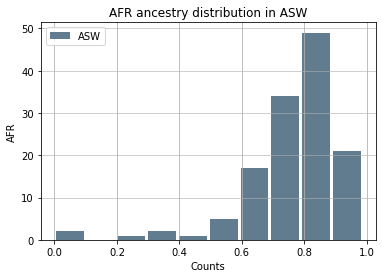

In [19]:
# Generate data on commute times.
df.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('AFR ancestry distribution in ASW')
plt.xlabel('Counts')
plt.ylabel('AFR')
plt.grid(axis='y', alpha=0.75)

In [21]:
# get the distribution exact number
pd.cut(df['ASW'], 10).value_counts().sort_index()

(-0.000489, 0.099]     2
(0.099, 0.197]         0
(0.197, 0.296]         1
(0.296, 0.394]         2
(0.394, 0.493]         1
(0.493, 0.591]         5
(0.591, 0.69]         17
(0.69, 0.788]         34
(0.788, 0.887]        49
(0.887, 0.985]        21
Name: ASW, dtype: int64

In [3]:
# make sure the input number of people are dividable to 100

n=10000
adm1 = int(n*0.01)
adm2 = int(n*0.01)
adm3 = int(n*0.01)
adm4 = int(n*0.01)
adm5 = int(n*0.01)
adm6 = int(n*0.03)
adm7 = int(n*0.13)
adm8 = int(n*0.26)
adm9 = int(n*0.37)
adm10 = int(n*0.16)
print(adm10)


1600


### Reformat local ancestry output of bedtools intersect

In [4]:
# try unmelt function in pandas to transform the bedtool output
import pandas as pd
df=pd.read_csv("test_result", sep="\t", header=None)
df.columns =['CHR', 'START', "END", "ANC", "IND"]
df

,CHR,START,END,ANC,IND
0,1,31,32,0,2245
1,1,226,227,0,2245
2,1,288,289,0,2245
3,1,528,529,0,2245
4,1,586,587,0,2245
...,...,...,...,...,...
22939195,1,999610,999611,0,2053
22939196,1,999690,999691,0,2053
22939197,1,999698,999699,0,2053
22939198,1,999827,999828,0,2053


In [17]:
# test with smaller df
df = pd.DataFrame({'end': ['30', '120', '30', '120', '30', '120'],
                   'loc': [1, 0, 1, 0, 1, 0],
                   'ind': ['1', '1', '2', '2', '3', '3']})
df

,end,loc,ind
0,30,1,1
1,120,0,1
2,30,1,2
3,120,0,2
4,30,1,3
5,120,0,3


In [18]:
# unmelt with pivot
df.pivot(index='end', columns= 'ind')
# it worked!

loc      
ind   1  2  3
end          
120   0  0  0
30    1  1  1

In [9]:
import pandas as pd
# load the sorted file
df=pd.read_csv("test_result_2_1", sep="\t", header=None)
df.columns =['CHR', 'START', "END", "ANC", "IND"]
# get end, anc and ind column only
df=df[['END', 'ANC', 'IND']]
df

,END,ANC,IND
0,16,0,687
1,60,0,687
2,110,0,687
3,222,0,687
4,438,0,687
...,...,...,...
23270395,999036,1,2399
23270396,999200,1,2399
23270397,999263,1,2399
23270398,999516,1,2399


In [12]:
# unmelt!
df_unmelt=df.pivot(index='END', columns= 'IND')

In [14]:
# output the unmelt dataframe in a file, without index
df_unmelt.to_csv('test_2', sep='\t', encoding='utf-8', header= False, index=False)

In [29]:
# output the index only
import numpy as np
a=df_unmelt.index.tolist()
np.savetxt("snp_map", 
           a,
           delimiter ="\n", 
           fmt ='% s')

In [16]:
df_unmelt.shape

(9696, 2400)

In [15]:
# extract the filename
bedfile="loc_anc_simAA_1Mb_1Kppl_10deme_chr1.vcf.txt.bed_intersect_uniq-tmp"
#filename
filename=bedfile.rsplit('.', 3)[0]
#print(filename)
f'{filename}.reformat'
f'{filename}.map'
#loc_anc_simAA_1Mb_1Kppl_10deme_chr1.reformat
#loc_anc_simAA_1Mb_1Kppl_10deme_chr1.map

'loc_anc_simAA_1Mb_1Kppl_10deme_chr1.map'